### 1. Load the dataset. 

In [1]:
import pandas as pd

path = './datasets/network_backup_dataset.csv'
network_backups = pd.read_csv(path)

In [2]:
size_column = network_backups['Size of Backup (GB)']
work_flow_column = network_backups['Work-Flow-ID']
week_column = network_backups['Week #']
day_of_week_column = network_backups['Day of Week']
start_time_column = network_backups['Backup Start Time - Hour of Day']
file_name_column = network_backups['File Name']

# Add day column
map_day = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
day = []
for i in range(0, 18588):
    day.append((week_column[i]-1)*7+map_day[day_of_week_column[i]])
network_backups.insert(2, 'day', day)

In [3]:
network_backups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18588 entries, 0 to 18587
Data columns (total 8 columns):
Week #                             18588 non-null int64
Day of Week                        18588 non-null object
day                                18588 non-null int64
Backup Start Time - Hour of Day    18588 non-null int64
Work-Flow-ID                       18588 non-null object
File Name                          18588 non-null object
Size of Backup (GB)                18588 non-null float64
Backup Time (hour)                 18588 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ MB


#### (a) For a twenty-day period (X-axis unit is day number) plot the backup sizes for all workflows (color coded on the Y-axis)

In [4]:
plot_day_limit = 20
total_size_per_workflow_per_day = {'work_flow_0':[0.0]*plot_day_limit, 'work_flow_1':[0.0]*plot_day_limit, 'work_flow_2':[0.0]*plot_day_limit, 'work_flow_3':[0.0]*plot_day_limit, 'work_flow_4':[0.0]*plot_day_limit}

In [5]:
for i in range(0, 18588):
    if day[i] > plot_day_limit:
        break
    total_size_per_workflow_per_day[work_flow_column[i]][day[i]-1] += size_column[i]
    
map_workflow = {0:'work_flow_0', 1:'work_flow_1', 2:'work_flow_2', 3:'work_flow_3', 4:'work_flow_4'}

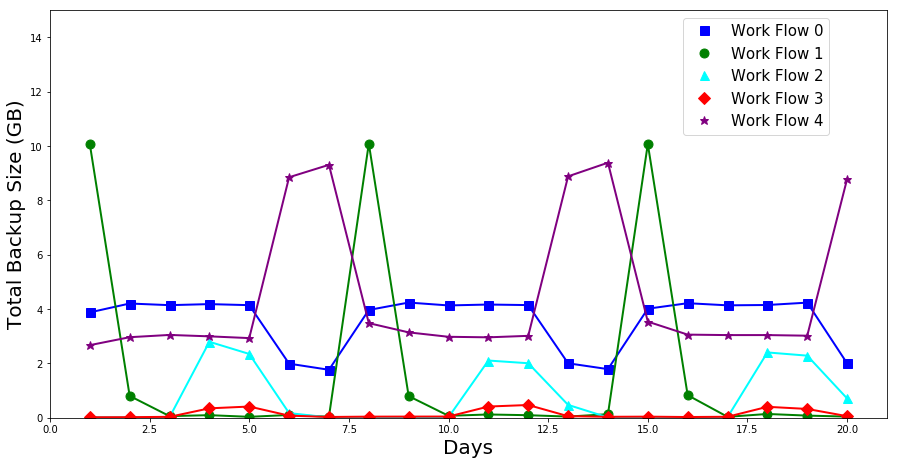

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,7.5))
style_list = ['s', 'o', '^', 'D', '*']
color_list = ['blue', 'green', 'cyan', 'red', 'purple']
for i in range(0, 5):
    plt.plot(range(1, plot_day_limit+1), total_size_per_workflow_per_day[map_workflow[i]], style_list[i], c = color_list[i], ms = 9.0, label = 'Work Flow '+str(i))
    plt.plot(range(1, plot_day_limit+1), total_size_per_workflow_per_day[map_workflow[i]], linewidth = 2, c = color_list[i])
plt.ylabel('Total Backup Size (GB)', fontsize = 20)
plt.xlabel('Days', fontsize = 20)
plt.axis([0,plot_day_limit+1,0, 15])
plt.legend(loc = 'upper right', bbox_to_anchor = (0.94, 1), fontsize=15, numpoints = 1)
plt.show()

#### (b) Do the same plot for the first 105-day period

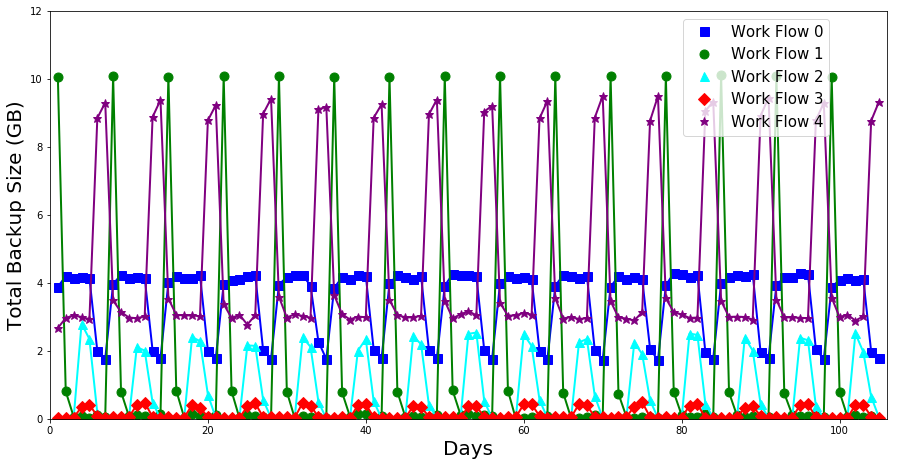

In [7]:
plot_day_limit = 105
total_size_per_workflow_per_day = {'work_flow_0':[0.0]*plot_day_limit, 'work_flow_1':[0.0]*plot_day_limit, 'work_flow_2':[0.0]*plot_day_limit, 'work_flow_3':[0.0]*plot_day_limit, 'work_flow_4':[0.0]*plot_day_limit}

for i in range(0, 18588):
    total_size_per_workflow_per_day[work_flow_column[i]][day[i]-1] += size_column[i]

plt.figure(figsize = (15,7.5))
for i in range(0, 5):
    plt.plot(range(1, plot_day_limit+1), total_size_per_workflow_per_day[map_workflow[i]], style_list[i], c = color_list[i], ms = 9.0, label = 'Work Flow '+str(i))
    plt.plot(range(1, plot_day_limit+1), total_size_per_workflow_per_day[map_workflow[i]], linewidth = 2.0, c = color_list[i])
plt.ylabel('Total Backup Size (GB)', fontsize = 20)
plt.xlabel('Days', fontsize = 20)
plt.axis([0,plot_day_limit+1,0, 12])
plt.legend(loc = 'upper right', bbox_to_anchor = (0.94, 1), fontsize=15, numpoints = 1)
plt.show()

### 2. Predict

#### (c) Now use a neural network regression model (one hidden layer) with all features one-hot encoded.
Parameters:

- Number of hidden units
- Activity Function(relu, logistic, tanh)

Plot Test-RMSE as a function of the number of hidden units for different activity functions. Report the best combination

In [8]:
network_backups.head()

,Week #,Day of Week,day,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,1,work_flow_2,File_16,0.0,0


In [9]:
network_backups.tail()

,Week #,Day of Week,day,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
18583,15,Sunday,105,21,work_flow_4,File_29,0.151538,1
18584,15,Sunday,105,21,work_flow_4,File_27,0.148363,1
18585,15,Sunday,105,21,work_flow_4,File_26,0.198572,2
18586,15,Sunday,105,21,work_flow_4,File_25,0.199570,2
18587,15,Sunday,105,21,work_flow_4,File_24,0.201201,2


**Preprocessing * day of week* **

In [10]:
day_of_week_dic = {'Monday':[1,0,0,0,0,0,0], 
                   'Tuesday':[0,1,0,0,0,0,0],
                   'Wednesday':[0,0,1,0,0,0,0],
                   'Thursday':[0,0,0,1,0,0,0],
                   'Friday':[0,0,0,0,1,0,0],
                   'Saturday':[0,0,0,0,0,1,0],
                   'Sunday':[0,0,0,0,0,0,1]}
day_of_week_one_hot = []

for item in day_of_week_column:
    day_of_week_one_hot.append(day_of_week_dic[item])

**Preprocessing *week* **

In [11]:
from numpy import array
from sklearn.preprocessing import OneHotEncoder

week = array([i for i in range(1, 16)])
onehot_encoder = OneHotEncoder(sparse=False).fit(week.reshape(len(week), 1))
week_encoded = onehot_encoder.transform(week_column.values.reshape(len(week_column),1)).tolist()

**Preprocessing *start time* **

In [12]:
start_time_encoded = onehot_encoder.fit_transform(start_time_column.values.reshape(len(start_time_column), 1))
start_time_encoded

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

**Preprocessing *work flow* **

In [13]:
work_flow_encoded = []
work_flow = {'work_flow_0':0, 'work_flow_1':1, 'work_flow_2':2, 'work_flow_3':3, 'work_flow_4':4}
onehot_encoder = OneHotEncoder(sparse=False).fit(array([i for i in work_flow.values()]).reshape(5, 1))
for i in work_flow_column:
    work_flow_encoded.append(*onehot_encoder.transform(work_flow[i]).tolist())

**Preprocessing *file name* **

In [14]:
file_name_encoded = []
file_name_dic = {}
for i in file_name_column:
    file_name_dic[i] = int(i[5:])

onehot_encoder = OneHotEncoder(sparse=False).fit(array([i for i in file_name_dic.values()]).reshape(len(file_name_dic), 1))
for i in file_name_column:
    file_name_encoded.append(*onehot_encoder.transform(file_name_dic[i]).tolist())

**Make up the input**

In [15]:
import numpy as np
theinput = np.hstack((day_of_week_one_hot, start_time_encoded, work_flow_encoded, file_name_encoded, week_encoded))

In [16]:
np.shape(theinput)

(18588, 63)

** RMSE **

In [17]:
import math
from sklearn.metrics import mean_squared_error

def calculate_RMSE(predicted, actual):  
    return math.sqrt(mean_squared_error(actual, predicted)) 

**Neural Network**

In [18]:
#from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

train_data = theinput.copy()
target = size_column
kf = KFold(n_splits=10)
#X_train,X_test,y_train,y_test = train_test_split(train_data, target, test_size=0.1, random_state = 42)

# relu
for i in range(50, 400, 50):
    print('Number of hidden units = ' + str(i))
    train_RMSE =[]
    test_RMSE = []
    neu_net_reg = MLPRegressor(hidden_layer_sizes=(i), max_iter=200)
    
    for train_index, test_index in kf.split(train_data):
        X_train, X_test = train_data[train_index], train_data[test_index]
        y_train, y_test = target[train_index], target[test_index]
    
        neu_net_reg.fit(X_train, y_train)

        train_RMSE.append(calculate_RMSE(y_train, neu_net_reg.predict(X_train)))
        test_RMSE.append(calculate_RMSE(y_test, neu_net_reg.predict(X_test)))
        
    print('  Average train RMSE = '+ str(sum(train_RMSE)/len(train_RMSE)))
    print('  Average test RMSE = '+ str(sum(test_RMSE)/len(test_RMSE)))

Number of hidden units = 50
  Average train RMSE = 0.028008357408009953
  Average test RMSE = 0.04403047023241398
Number of hidden units = 100
  Average train RMSE = 0.02189883204362518
  Average test RMSE = 0.036624794913041936
Number of hidden units = 150
  Average train RMSE = 0.019416504942698636
  Average test RMSE = 0.03336475860122732
Number of hidden units = 200
  Average train RMSE = 0.017996239821095605
  Average test RMSE = 0.03314375233466448
Number of hidden units = 250
  Average train RMSE = 0.01692839965876829
  Average test RMSE = 0.03126490873646231
Number of hidden units = 300
  Average train RMSE = 0.016757624017231586
  Average test RMSE = 0.0370843399506531
Number of hidden units = 350
  Average train RMSE = 0.016075818860824966
  Average test RMSE = 0.03198062633814855


In [19]:
# logistic
for i in range(50, 400, 50):
    print('Number of hidden units = ' + str(i))
    train_RMSE =[]
    test_RMSE = []
    neu_net_reg = MLPRegressor(hidden_layer_sizes=(i), activation = 'logistic', max_iter=200)
    
    for train_index, test_index in kf.split(train_data):
        X_train, X_test = train_data[train_index], train_data[test_index]
        y_train, y_test = target[train_index], target[test_index]
    
        neu_net_reg.fit(X_train, y_train)

        train_RMSE.append(calculate_RMSE(y_train, neu_net_reg.predict(X_train)))
        test_RMSE.append(calculate_RMSE(y_test, neu_net_reg.predict(X_test)))
        
    print('  Average train RMSE = '+ str(sum(train_RMSE)/len(train_RMSE)))
    print('  Average test RMSE = '+ str(sum(test_RMSE)/len(test_RMSE)))

Number of hidden units = 50
  Average train RMSE = 0.08853851999391535
  Average test RMSE = 0.08934284124680676
Number of hidden units = 100
  Average train RMSE = 0.08888422979960624
  Average test RMSE = 0.09078259433902162
Number of hidden units = 150
  Average train RMSE = 0.08877706412622188
  Average test RMSE = 0.09073421731718626
Number of hidden units = 200
  Average train RMSE = 0.08894174635633989
  Average test RMSE = 0.09025904803216207
Number of hidden units = 250
  Average train RMSE = 0.08932443873993941
  Average test RMSE = 0.09205346779771303
Number of hidden units = 300
  Average train RMSE = 0.08920740601751295
  Average test RMSE = 0.09116782081803648
Number of hidden units = 350
  Average train RMSE = 0.09106064171350232
  Average test RMSE = 0.0913320820057702


In [20]:
# tanh
for i in range(50, 400, 50):
    print('Number of hidden units = ' + str(i))
    train_RMSE =[]
    test_RMSE = []
    neu_net_reg = MLPRegressor(hidden_layer_sizes=(i), activation = 'tanh', max_iter=200)
    
    for train_index, test_index in kf.split(train_data):
        X_train, X_test = train_data[train_index], train_data[test_index]
        y_train, y_test = target[train_index], target[test_index]
    
        neu_net_reg.fit(X_train, y_train)

        train_RMSE.append(calculate_RMSE(y_train, neu_net_reg.predict(X_train)))
        test_RMSE.append(calculate_RMSE(y_test, neu_net_reg.predict(X_test)))
        
    print('  Average train RMSE = '+ str(sum(train_RMSE)/len(train_RMSE)))
    print('  Average test RMSE = '+ str(sum(test_RMSE)/len(test_RMSE)))

Number of hidden units = 50
  Average train RMSE = 0.07785302580668083
  Average test RMSE = 0.08633817282533277
Number of hidden units = 100
  Average train RMSE = 0.06996907999936039
  Average test RMSE = 0.07299001015759177
Number of hidden units = 150
  Average train RMSE = 0.06942249296074934
  Average test RMSE = 0.08145971336226963
Number of hidden units = 200
  Average train RMSE = 0.08375128732764914
  Average test RMSE = 0.09704597276355789
Number of hidden units = 250
  Average train RMSE = 0.08973210509649669
  Average test RMSE = 0.09435147355052191
Number of hidden units = 300
  Average train RMSE = 0.09009442403662694
  Average test RMSE = 0.09384742297955437
Number of hidden units = 350
  Average train RMSE = 0.09097269065458621
  Average test RMSE = 0.09439616793578495


**(i) Plot fitted values against true values scattered over the number of data points**

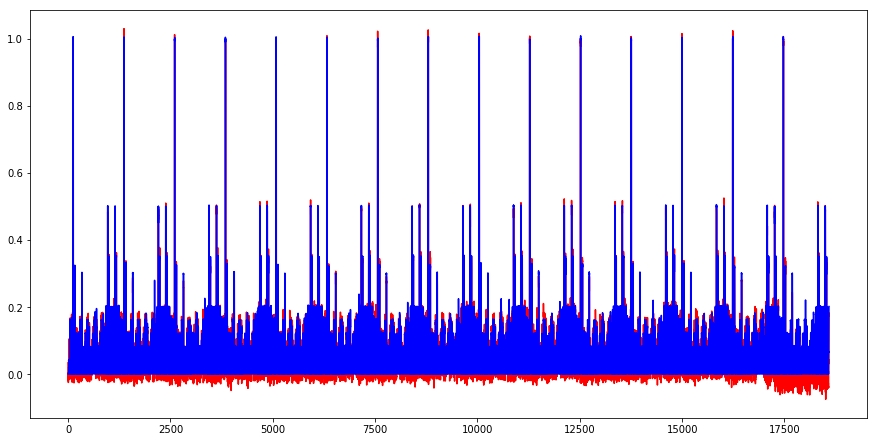

In [23]:
from sklearn.model_selection import train_test_split

neu_net_reg = MLPRegressor(hidden_layer_sizes=(300), max_iter=200)

for train_index, test_index in kf.split(train_data):
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    neu_net_reg.fit(X_train, y_train)

plt.figure(figsize = (15,7.5))
plt.plot(range(1, len(target)+1), neu_net_reg.predict(train_data), c='red')
plt.plot(range(1, len(target)+1), target, c='blue')
plt.show()

**(ii) Plot residuals versus fitted values scattered over the number of data points
using the whole dataset for each model with the best parameters you have found.**

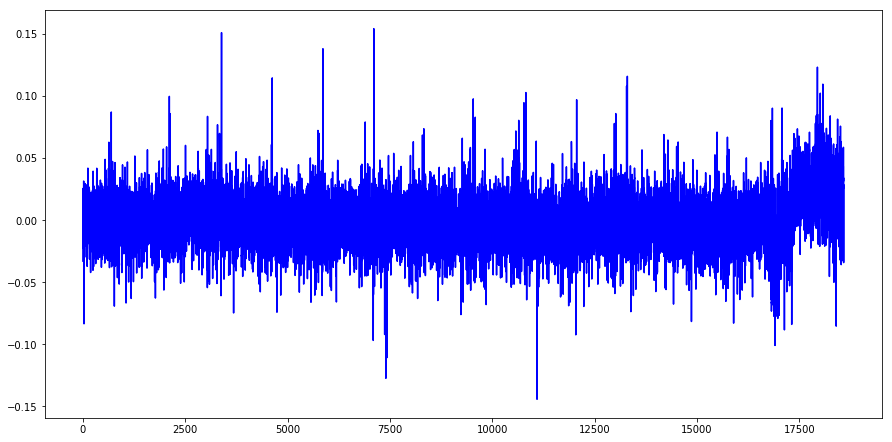

In [25]:
plt.figure(figsize = (15,7.5))
plt.plot(range(1, len(target)+1), target-neu_net_reg.predict(train_data), c='blue')
plt.show()